in here we have the informations about patients that we need to cure the problem with the current informations about the patient
so lets organize them  

In [33]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

<h2 id="load_dataset">Classification of Heart Attack Data information</h2>
The example is based on a dataset that is publicly available from the UCI Machine Learning Repository (Asuncion and Newman, 2007)[http://mlearn.ics.uci.edu/MLRepository.html]. The dataset consists of several hundred human cell sample records, each of which contains the values of a set of cell characteristics. The fields in each record are:

|Field name|Description|
|--- |--- |
|Sex|Male or Female|
|Age|A number|
|Exang|1 means yes & 0 means no|
|Ca|from 1 to 4 (1means pain from heart and 4 means nothing)|
|Trtbps|blood presure when in rest| 
|Chol|cholostrol|
|Fbs|1 means yes & 0 means don't|
|Rest_ecg|result of heart checkup when in rest|
|rest_ecg nums|0 means normal,1 means ST section is unnatural |
|Thalach|maximum bps|
|Target|chance rate of heart attack|
|Target|0 means low,1 means high|
<br>
<br>

For the purposes of this example, we're using a dataset that has a relatively small number of predictors in each record. To download the data, we will use `!wget` to download it from IBM Object Storage.

**Did you know?** When it comes to Machine Learning, you will likely be working with large datasets. As a business, where can you host your data? IBM is offering a unique opportunity for businesses, with 10 Tb of IBM Cloud Object Storage: [Sign up now for free](http://cocl.us/ML0101EN-IBM-Offer-CC)


In [ ]:
churn_df = pd.read_csv(" ")
churn_df.head(10)
print(f"whole dataset has: {churn_df.shape[0]} people")

whole dataset has: 303 people


In [35]:
churn_df = churn_df[['age', 'sex', 'exng', 'caa', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'output']]
churn_df['output'] = churn_df['output'].astype('int')
churn_df.head()

,age,sex,exng,caa,trtbps,chol,fbs,restecg,thalachh,output
0,63,1,0,0,145,233,1,0,150,1
1,37,1,0,0,130,250,0,1,187,1
2,41,0,0,0,130,204,0,0,172,1
3,56,1,0,0,120,236,0,1,178,1
4,57,0,1,0,120,354,0,1,163,1


To see how many columns do we have


In [36]:
rows,columns = churn_df.shape
print(f'we have {columns} columns and {rows} rows')

we have 10 columns and 303 rows


Define our Xs and Y

In [37]:
X = np.asarray(churn_df[['age', 'sex', 'exng', 'caa', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh']])
X[0:5]

array([[ 63,   1,   0,   0, 145, 233,   1,   0, 150],
       [ 37,   1,   0,   0, 130, 250,   0,   1, 187],
       [ 41,   0,   0,   0, 130, 204,   0,   0, 172],
       [ 56,   1,   0,   0, 120, 236,   0,   1, 178],
       [ 57,   0,   1,   0, 120, 354,   0,   1, 163]])

In [38]:
y = np.asarray(churn_df['output'])
y[0:5]

array([1, 1, 1, 1, 1])

Normalize the Dataset

In [39]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.95,  0.68, -0.7 , -0.71,  0.76, -0.26,  2.39, -1.01,  0.02],
       [-1.92,  0.68, -0.7 , -0.71, -0.09,  0.07, -0.42,  0.9 ,  1.63],
       [-1.47, -1.47, -0.7 , -0.71, -0.09, -0.82, -0.42, -1.01,  0.98],
       [ 0.18,  0.68, -0.7 , -0.71, -0.66, -0.2 , -0.42,  0.9 ,  1.24],
       [ 0.29, -1.47,  1.44, -0.71, -0.66,  2.08, -0.42,  0.9 ,  0.58]])

Train the Dataset
with split into train and test sets

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (242, 9) (242,)
Test set: (61, 9) (61,)


<h2 id="modeling">Modeling (Logistic Regression with Scikit-learn)</h2>


In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

and now predict while using our test set

In [42]:
yhat = LR.predict(X_test)
yhat

array([1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1])

In [43]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.34, 0.66],
       [0.68, 0.32],
       [0.36, 0.64],
       [0.23, 0.77],
       [0.42, 0.58],
       [0.44, 0.56],
       [0.51, 0.49],
       [0.29, 0.71],
       [0.59, 0.41],
       [0.44, 0.56],
       [0.4 , 0.6 ],
       [0.3 , 0.7 ],
       [0.36, 0.64],
       [0.57, 0.43],
       [0.43, 0.57],
       [0.68, 0.32],
       [0.43, 0.57],
       [0.36, 0.64],
       [0.76, 0.24],
       [0.44, 0.56],
       [0.3 , 0.7 ],
       [0.37, 0.63],
       [0.7 , 0.3 ],
       [0.51, 0.49],
       [0.45, 0.55],
       [0.61, 0.39],
       [0.52, 0.48],
       [0.34, 0.66],
       [0.6 , 0.4 ],
       [0.77, 0.23],
       [0.51, 0.49],
       [0.5 , 0.5 ],
       [0.28, 0.72],
       [0.39, 0.61],
       [0.5 , 0.5 ],
       [0.29, 0.71],
       [0.36, 0.64],
       [0.36, 0.64],
       [0.43, 0.57],
       [0.72, 0.28],
       [0.58, 0.42],
       [0.68, 0.32],
       [0.64, 0.36],
       [0.36, 0.64],
       [0.33, 0.67],
       [0.36, 0.64],
       [0.68, 0.32],
       [0.53,

<h2 id="evaluation">Evaluation</h2>


In [44]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label=0)

np.float64(0.6451612903225806)

### confusion matrix

Another way of looking at the accuracy of the classifier is to look at **confusion matrix**.


In [45]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[30  6]
 [ 5 20]]


Confusion matrix, without normalization
[[30  6]
 [ 5 20]]


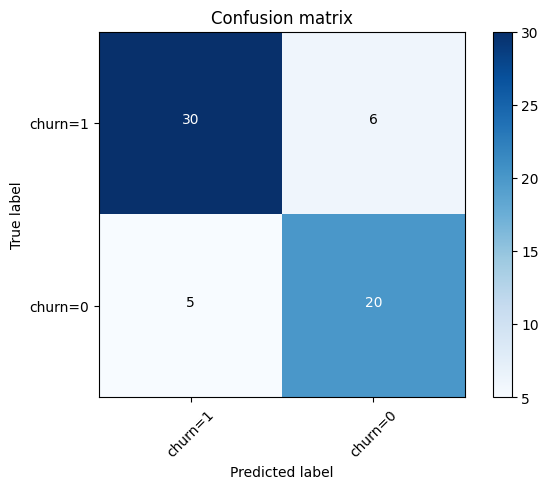

In [46]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [47]:
print (classification_report(y_test, yhat))


              precision    recall  f1-score   support

           0       0.77      0.80      0.78        25
           1       0.86      0.83      0.85        36

    accuracy                           0.82        61
   macro avg       0.81      0.82      0.81        61
weighted avg       0.82      0.82      0.82        61



In [48]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.5090380539772343

<h2 id="Our Predict">Our Predict</h2>


In [49]:
churn_df['output'].value_counts()


output
1    165
0    138
Name: count, dtype: int64